In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [6]:
df = pd.read_csv(r"C:\Users\71589\Desktop\Train_Data.csv")

In [7]:
df

,age,sex,bmi,smoker,region,children,charges
0,21.000000,male,25.745000,no,northeast,2,3279.868550
1,36.976978,female,25.744165,yes,southeast,3,21454.494239
2,18.000000,male,30.030000,no,southeast,1,1720.353700
3,37.000000,male,30.676891,no,northeast,3,6801.437542
4,58.000000,male,32.010000,no,southeast,1,11946.625900
...,...,...,...,...,...,...,...
3625,48.820767,female,41.426984,no,northwest,4,10987.324964
3626,38.661977,female,26.202557,no,southeast,2,11735.844352
3627,56.000000,male,40.300000,no,southwest,0,10602.385000
3628,48.061207,female,34.930624,no,southeast,1,8976.140452


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3630 entries, 0 to 3629
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       3630 non-null   float64
 1   sex       3630 non-null   object 
 2   bmi       3630 non-null   float64
 3   smoker    3630 non-null   object 
 4   region    3630 non-null   object 
 5   children  3630 non-null   int64  
 6   charges   3630 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 198.6+ KB


<Axes: >

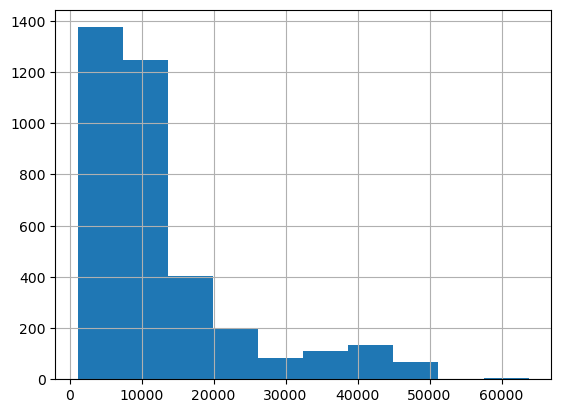

In [9]:
df.charges.hist()

<Axes: >

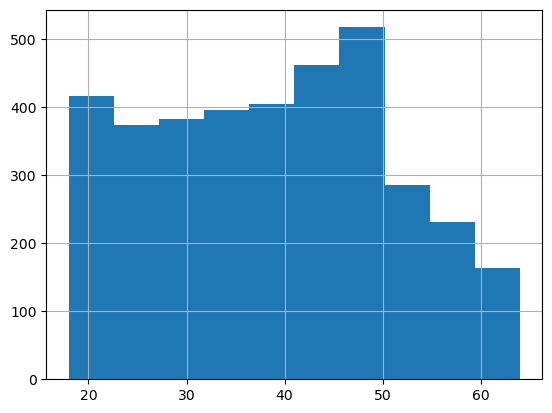

In [10]:
df.age.hist()

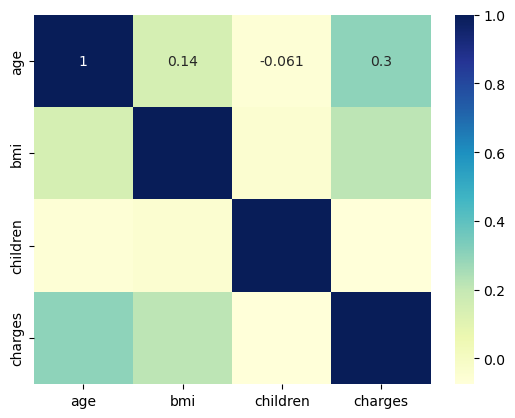

In [11]:
corr = df.select_dtypes(include=np.number).corr()
dataplot = sb.heatmap(corr,  annot=True, cmap="YlGnBu") # cmap="YlGnBu",
plt.show()

C:\Users\71589\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\71589\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\71589\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\71589\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

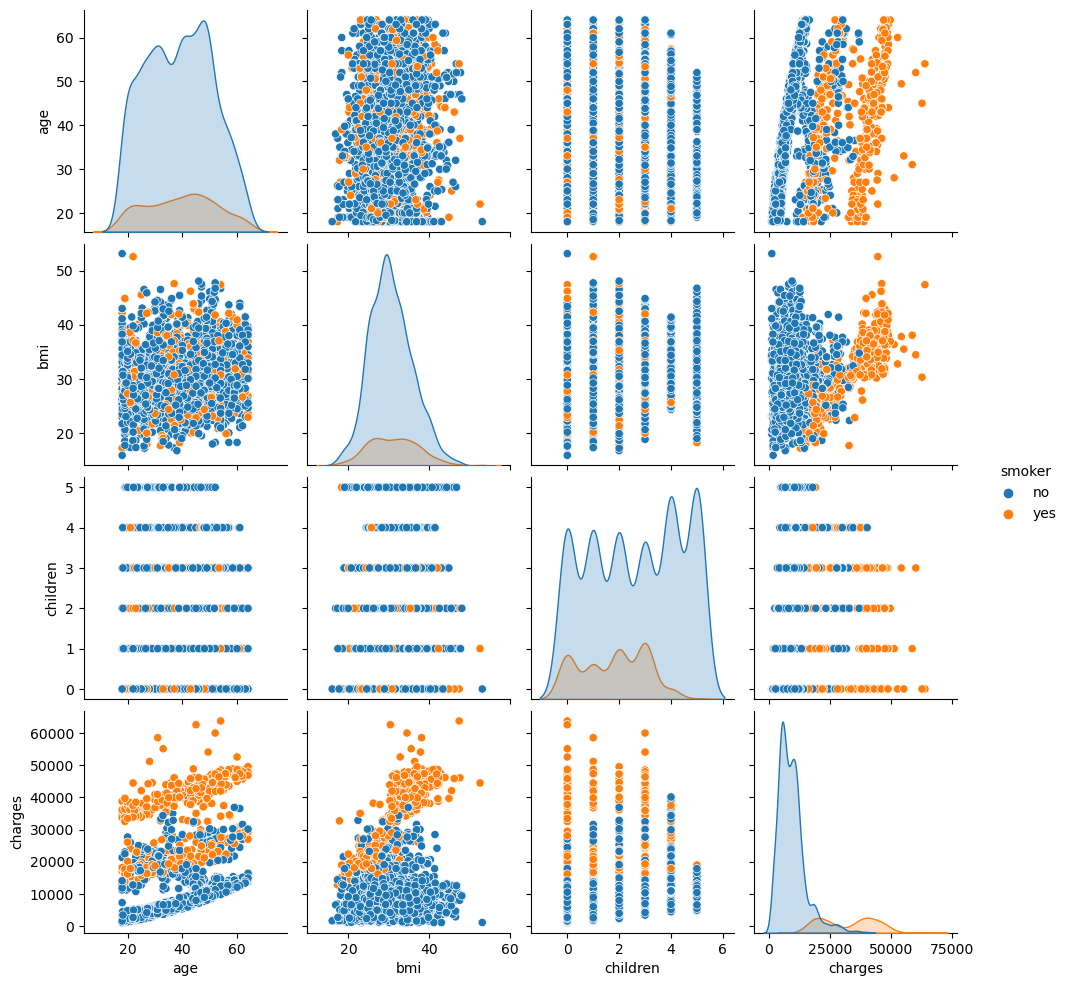

In [12]:
# pairplot with hue sex
sb.pairplot(df, hue="smoker")
# to show
plt.show()

In [13]:
categorical = df.select_dtypes(exclude = np.number).columns # Select columns with non-numeric data types (categorical columns)

categorical

Index(['sex', 'smoker', 'region'], dtype='object')

In [14]:
df1 = df.copy()
classes = dict()
le = LabelEncoder()
for col in categorical:
    df1[col]= le.fit_transform(df1[col])
    classes[col] = le.classes_

In [15]:
df1

,age,sex,bmi,smoker,region,children,charges
0,21.000000,1,25.745000,0,0,2,3279.868550
1,36.976978,0,25.744165,1,2,3,21454.494239
2,18.000000,1,30.030000,0,2,1,1720.353700
3,37.000000,1,30.676891,0,0,3,6801.437542
4,58.000000,1,32.010000,0,2,1,11946.625900
...,...,...,...,...,...,...,...
3625,48.820767,0,41.426984,0,1,4,10987.324964
3626,38.661977,0,26.202557,0,2,2,11735.844352
3627,56.000000,1,40.300000,0,3,0,10602.385000
3628,48.061207,0,34.930624,0,2,1,8976.140452


In [16]:
X = df1.drop(columns = 'charges').values # Create feature matrix X by dropping the 'charges' column from df1

X

array([[21.        ,  1.        , 25.745     ,  0.        ,  0.        ,
         2.        ],
       [36.976978  ,  0.        , 25.74416485,  1.        ,  2.        ,
         3.        ],
       [18.        ,  1.        , 30.03      ,  0.        ,  2.        ,
         1.        ],
       ...,
       [56.        ,  1.        , 40.3       ,  0.        ,  3.        ,
         0.        ],
       [48.06120669,  0.        , 34.93062394,  0.        ,  2.        ,
         1.        ],
       [37.59886461,  0.        , 25.21923327,  0.        ,  0.        ,
         3.        ]])

In [17]:
y = df1['charges'].values# Extract the target variable 'charges' into array y from df1
y

array([ 3279.86855   , 21454.49423864,  1720.3537    , ...,
       10602.385     ,  8976.14045154,  7027.69896823])

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # Split the dataset into training and testing sets with a test size of 30% and random state 42
X_test.shape

(1089, 6)

In [20]:
# Create a Linear Regression model (OLS) and fit it to the training data

reg = LinearRegression() # Ordinary Least Squares (OLS)
reg.fit(X_train, y_train)

LinearRegression()

In [21]:
y_pred = reg.predict(X_test)

In [22]:
y_pred[:10] # Displaying the first 10 predictions made by the Linear Regression model


array([12355.83506778,  9783.18410297,  6159.4595653 , 12663.9058773 ,
        7387.24286265,  9708.76982242, 10162.98617928,  9382.1604662 ,
       13038.80138841,  4875.03429638])

In [23]:
y_pred[:8]

array([12355.83506778,  9783.18410297,  6159.4595653 , 12663.9058773 ,
        7387.24286265,  9708.76982242, 10162.98617928,  9382.1604662 ])